# WeatherPy
----

#### Observations
* The weather does get warmer the closer you get to the equator, and colder the further away you get.


* Amongst my graphs, the "Northern Hemisphere - Max Temp vs. Latitude Linear Regression" has the closest to 1 r-squared value which means most of the data fits the regression model.


* Humidity, Cloudiness, and Wind Speed don't appear to be affected by latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 600: Tasiilaq
Processing Record 2 of 600: Vao
Processing Record 3 of 600: Kirkuk
Processing Record 4 of 600: Ushuaia
Processing Record 5 of 600: Fairbanks
Processing Record 6 of 600: Shelburne
Processing Record 7 of 600: Busselton
Processing Record 8 of 600: Bluff
Processing Record 9 of 600: Puerto Ayora
Processing Record 10 of 600: Tuy Hoa
Processing Record 11 of 600: Kaitangata
Processing Record 12 of 600: Grand Gaube
Processing Record 13 of 600: Punta Arenas
Processing Record 14 of 600: São Filipe
City not found. Skipping...
Processing Record 16 of 600: Pevek
Processing Record 17 of 600: Nikolskoye
Processing Record 18 of 600: Lagoa
Processing Record 19 of 600: Barrow
Processing Record 20 of 600: Berezovyy
City not found. Skipping...
Processing Record 22 of 600: Verkhoyansk
Processing Record 23 of 600: Tuktoyaktuk
Processing Record 24 of 600: Leningradskiy
Processing Record 25 of 600: Honningsvåg
Processin

Processing Record 215 of 600: Severo-Kuril'sk
Processing Record 216 of 600: Karaman Province
City not found. Skipping...
Processing Record 218 of 600: Saint-Pierre
Processing Record 219 of 600: Huarmey
Processing Record 220 of 600: San Patricio
Processing Record 221 of 600: Ures
Processing Record 222 of 600: San Isidro
Processing Record 223 of 600: Arrondissement de Vannes
Processing Record 224 of 600: Bredasdorp
Processing Record 225 of 600: Rundu
Processing Record 226 of 600: Borkenes
Processing Record 227 of 600: San Andrés
Processing Record 228 of 600: Castro
Processing Record 229 of 600: Clyde River
Processing Record 230 of 600: Chernyshevskiy
Processing Record 231 of 600: Ribeira Grande
Processing Record 232 of 600: San Jose
Processing Record 233 of 600: Haines Junction
Processing Record 234 of 600: Meulaboh
Processing Record 235 of 600: Iqaluit
Processing Record 236 of 600: Makkah al Mukarramah
Processing Record 237 of 600: Igarka
Processing Record 238 of 600: Vardø
City not fou

Processing Record 430 of 600: Neiafu
Processing Record 431 of 600: Marzuq
Processing Record 432 of 600: Warrington
Processing Record 433 of 600: Adrar
Processing Record 434 of 600: Tazovsky
Processing Record 435 of 600: Merta
Processing Record 436 of 600: La Libertad
Processing Record 437 of 600: Sur
Processing Record 438 of 600: Katangli
Processing Record 439 of 600: Álamos
Processing Record 440 of 600: Bubaque
Processing Record 441 of 600: Skjervøy
Processing Record 442 of 600: Veselynove
Processing Record 443 of 600: Taldan
Processing Record 444 of 600: Kuril'sk
Processing Record 445 of 600: Tibati
Processing Record 446 of 600: Vanimo
Processing Record 447 of 600: Polyanka
Processing Record 448 of 600: Tiznit Province
Processing Record 449 of 600: Mahina
Processing Record 450 of 600: Sitka
Processing Record 451 of 600: Geraldton
City not found. Skipping...
Processing Record 453 of 600: Alto Araguaia
Processing Record 454 of 600: Nikel
Processing Record 455 of 600: Labuhan
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# to convert timestamp to regular date
from datetime import datetime

converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# read csv file
df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": converted_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
df.count()

City               552
Country            552
Date               552
Latitude           552
Longitude          552
Cloudiness         552
Humidity           552
Max Temperature    552
Wind Speed         552
dtype: int64

In [5]:
# print data frame
df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Tasiilaq,GL,2020-03-17 16:20:13,65.61,-37.64,20,78,14.00,3.36
1,Vao,NC,2020-03-17 16:20:13,-22.67,167.48,26,76,76.55,18.81
2,Kirkuk,IQ,2020-03-17 16:20:13,35.47,44.39,0,62,59.63,14.52
3,Ushuaia,AR,2020-03-17 16:18:17,-54.80,-68.30,75,50,55.40,3.36
4,Fairbanks,US,2020-03-17 16:20:03,64.84,-147.72,1,73,34.00,6.93
...,...,...,...,...,...,...,...,...,...
547,Batagay,RU,2020-03-17 16:20:45,67.63,134.63,100,99,-6.07,2.42
548,Belém de São Francisco,BR,2020-03-17 16:20:45,-8.75,-38.97,100,55,85.91,4.05
549,Jalu,LY,2020-03-17 16:20:45,29.03,21.55,0,28,62.87,16.24
550,Karla,EE,2020-03-17 16:20:45,59.37,24.93,90,80,43.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

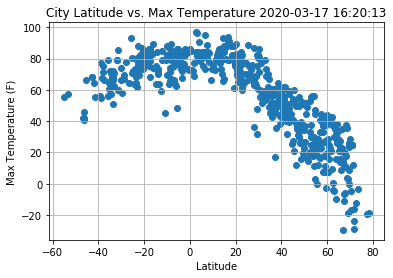

This scatterplot shows the relationship between the max temperature (F) in each city based on its latitude. Based on the results, it seems the closer you get to the equator the hotter it gets, and the further away, the colder it gets.


In [6]:
# create scatter plot
plt.scatter(df["Latitude"], df["Max Temperature"])

# add labels and title
plt.title(f"City Latitude vs. Max Temperature {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/1LatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

#### Latitude vs. Humidity Plot

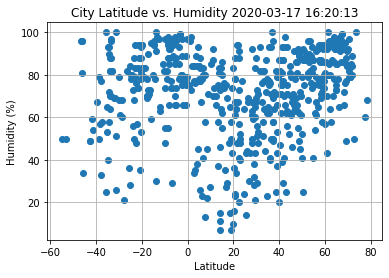

This scatterplot shows the relationship between the humidity (%) in each city based on its latitude. Based on the results, it does not seem that latitude affects humidity since the data points are all over the place.


In [7]:
# create scatter plot
plt.scatter(df["Latitude"], df["Humidity"])

# add labels and title
plt.title(f"City Latitude vs. Humidity {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/2LatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

#### Latitude vs. Cloudiness Plot

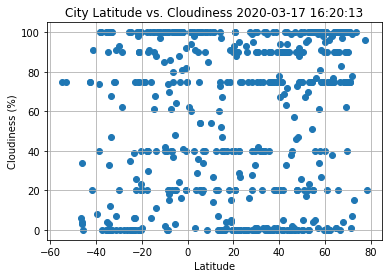

This scatterplot shows the relationship between the cloudiness (%) in each city based on its latitude. Based on the results, it does not seem that latitude affects cloudiness since the data points are all over the place.


In [8]:
# create scatter plot
plt.scatter(df["Latitude"], df["Cloudiness"])

# add labels and title
plt.title(f"City Latitude vs. Cloudiness {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/3LatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

#### Latitude vs. Wind Speed Plot

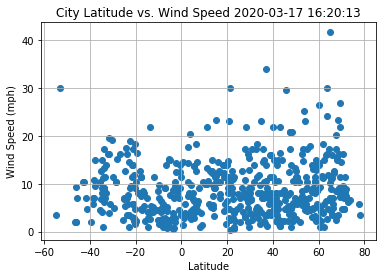

This scatterplot shows the relationship between the wind speed (mph) in each city based on its latitude. Based on the results, it does not seem that latitude affects wind speed since the data points are all over the place.


In [9]:
# create scatter plot
plt.scatter(df["Latitude"], df["Wind Speed"])

# add labels and title
plt.title(f"City Latitude vs. Wind Speed {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/4LatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")

## Linear Regression

In [10]:
# x axis for noth and souht
nx_values = []
sx_values = []

# y axis for temp
ny_values = []
sy_values = []

# y axis for humidity
nhy_values = []
shy_values = []

# y axis for cloudiness
ncy_values = []
scy_values = []

# y axis for wind speed
nwy_values = []
swy_values = []

# create index
indexes = range(0, len(df["City"]))

# append arrays
for index in indexes:
    if df["Latitude"][index] >= 0:
        nx_values.append(df["Latitude"][index])
        ny_values.append(df["Max Temperature"][index])
        nhy_values.append(df["Humidity"][index])
        ncy_values.append(df["Cloudiness"][index])
        nwy_values.append(df["Wind Speed"][index])
    if df["Latitude"][index] < 0:
        sx_values.append(df["Latitude"][index])
        sy_values.append(df["Max Temperature"][index])
        shy_values.append(df["Humidity"][index])
        scy_values.append(df["Cloudiness"][index])
        swy_values.append(df["Wind Speed"][index])
        
# convert all array values from float to integer
nx_values = np.array(nx_values, dtype = "int")
sx_values = np.array(sx_values, dtype = "int")
ny_values = np.array(ny_values, dtype = "int")
sy_values = np.array(sy_values, dtype = "int")
nhy_values = np.array(nhy_values, dtype = "int")
shy_values = np.array(shy_values, dtype = "int")
ncy_values = np.array(ncy_values, dtype = "int")
scy_values = np.array(scy_values, dtype = "int")
nwy_values = np.array(nwy_values, dtype = "int")
swy_values = np.array(swy_values, dtype = "int")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8885061607589173


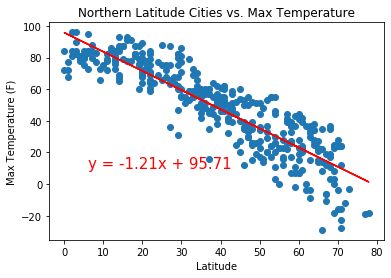

This scatterplot shows the relationship between the max temperature (F) in each northern city based on its latitude. Based on the results, it seems the closer you get to the equator the hotter it gets, and the further away, the colder it gets.


In [11]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ny_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ny_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/5NLatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each northern city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5564459214970253


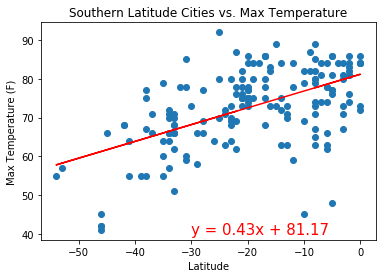

This scatterplot shows the relationship between the max temperature (F) in each southern city based on its latitude. Based on the results, it seems the closer you get to the equator the hotter it gets, and the further away, the colder it gets.


In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, sy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, sy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/6SLatvTemp.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the max temperature (F) \
in each southern city based on its latitude. Based on the results, it seems the closer \
you get to the equator the hotter it gets, and the further away, the colder it gets.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3873341257617459


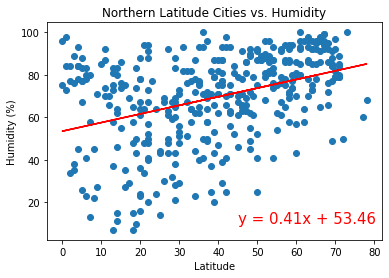

This scatterplot shows the relationship between the humidity (%) in each northern city based on its latitude. Based on the results, it does not seem that latitude affects humidity since the data points are all over the place.


In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nhy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nhy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/7NLatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.307471816320726


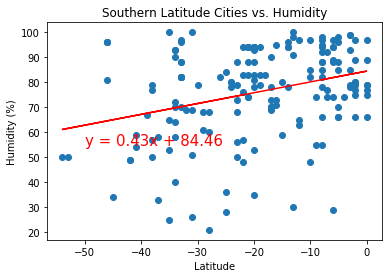

This scatterplot shows the relationship between the humidity (%) in each southern city based on its latitude. Based on the results, it does not seem that latitude affects humidity since the data points are all over the place.


In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, shy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, shy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/8SLatvHumid.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the humidity (%) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects humidity since the data points are all over the place.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20590152491384428


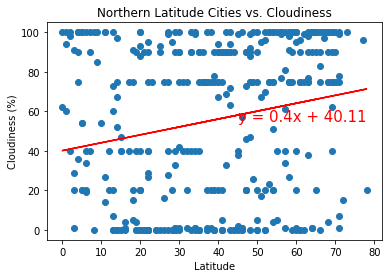

This scatterplot shows the relationship between the cloudiness (%) in each northern city based on its latitude. Based on the results, it does not seem that latitude affects cloudiness since the data points are all over the place.


In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ncy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ncy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/9NLatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23556302674162488


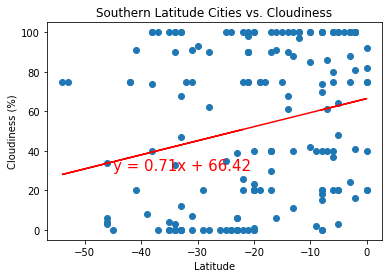

This scatterplot shows the relationship between the cloudiness (%) in each southern city based on its latitude. Based on the results, it does not seem that latitude affects cloudiness since the data points are all over the place.


In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, scy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, scy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/10SLatvCloud.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the cloudiness (%) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects cloudiness since the data points are all over the place.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06794232206589987


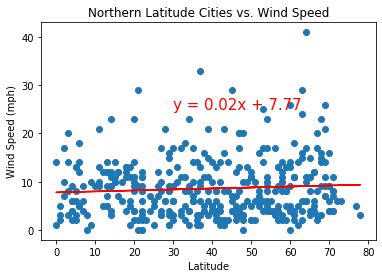

This scatterplot shows the relationship between the wind speed (mph) in each northern city based on its latitude. Based on the results, it does not seem that latitude affects wind speed since the data points are all over the place.


In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nwy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nwy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/11NLatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each northern city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22064699115380224


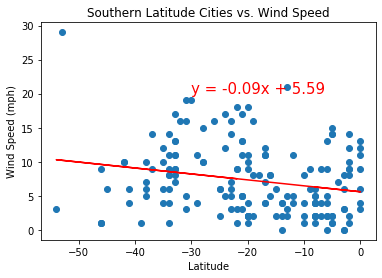

This scatterplot shows the relationship between the wind speed (mph) in each southern city based on its latitude. Based on the results, it does not seem that latitude affects wind speed since the data points are all over the place.


In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, swy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, swy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/12sLatvWind.png")
plt.show()

# graph explanation
print("This scatterplot shows the relationship between the wind speed (mph) \
in each southern city based on its latitude. Based on the results, it does not seem \
that latitude affects wind speed since the data points are all over the place.")